# COMP 351: Homework Assignment 4
### By Shreya P. 

In [178]:
import pandas as pd #import pandas
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

###### Load the file: 

In [160]:
#read CSV file
df = pd.read_csv("titanic.csv", index_col=0)

#display the first 5 rows
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Exploring the Dataset

In [161]:
#display the last 5 rows
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [162]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [163]:
#df = df.drop(columns=["Pclass","Name", "Ticket", "Cabin"]) #drop extra cols 
#df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [164]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [165]:
# Split features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [166]:
X_train.shape

(712, 8)

###### Observations

We want to know which columns contributed the most to whether the person survived or not.

(Useful) Features of the dataset:
- Pclass
- Sex
- Age
- SibSp
- Parch
- Fare
- Embarked

Response:
y = Survived
whether the passenger survived (1) or not (0)

What else do we know?
Because the response variable is continuous, this is a regression problem. However, it does not make sense to use linear regression here. Since "Survivial" is classified as a binary choice, linear regression would not be good for predicting binary outcomes. We want something that looks more like a log graph, hence we will use logarithmic regression.

Note: linear regression is good for best fit; logarithmic regression is good for classification.

### Train the models

In [167]:
# Setup cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  #randomize order by shuffle = True

#### Logistic Regression Model

In [168]:
log_model = LogisticRegression(max_iter=1000)#initialize model
# Train and evaluate with cross-validation
log_scores = cross_val_score(log_model, X_scaled, y, cv=kfold)
print(log_scores.mean())
#[0.81005587 0.79775281 0.84269663 0.7752809  0.78089888]

0.8013370158809867


#### KNN Model

In [169]:
avgScore = 0
maxKnn = 0
maxK = 1 #meaning k with best Knn Score
n = 100
for k in range(1,n):
    knn = KNeighborsClassifier(n_neighbors=k)
    knnScores = cross_val_score(knn, X_scaled, y, cv=kfold)
    avgScore += knnScores.mean()
    #knn_accuracies.append(knnScores)
    #print(f"KNN (k={k}) Accuracy: {knnScores.mean():.4f}")
    if knnScores.mean() > maxKnn: #if max
        maxKnn = knnScores.mean()
        maxK = k
#print(avgScore/n)
#print(maxKnn, maxK)
print("The best k is", maxK)

The best k is 15


#### Decision Tree Model

In [170]:
#print("Tuning Decision Tree max_depth...")
bestDTScore = 0
avgDt = 0
bestDt = 1
for d in range(1, n): #iterates the tree depth
    dt = DecisionTreeClassifier(max_depth=d, random_state=42) #vary random_state? 
    dtScores = cross_val_score(dt, X, y, cv=kfold)
    avgDt += dtScores.mean()
    if dtScores.mean() > bestDTScore: #if max
        bestDTScore = dtScores.mean()
        bestDt = d
    #print(f"max_depth = {j}: Accuracy = {dtScores.mean():.4f}")
#print(avgDt/n)#average
#print(bestDTScore, bestDt)
print("The best depth is", bestDt)

The best depth is 6


#### Research Task: Random Forest

In [171]:
model = RandomForestClassifier(random_state=42) #model type
#n_estimators, max_depth, max_features
maxN = 500
rfScores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy') #calculate accuracy

#Report mean accuracy
print("Cross-validated accuracy scores:", rfScores)
print("Mean accuracy: {:.4f}".format(np.mean(rfScores)))

Cross-validated accuracy scores: [0.81005587 0.78089888 0.84831461 0.80898876 0.8258427 ]
Mean accuracy: 0.8148


In [172]:
bestScore = 0
bestN = 1
bestD = 1
sumScore = 0
mCount = 0

for nEst in range(20, 100, 20):
    for d in range(1, n//4): #n is 100 
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rfScores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
        mean = rfScores.mean()
        sumScore += mean
        mCount += 1 #previously didn't need, but now double loop. 
        if mean > bestScore:
            bestScore = mean
            bestN = nEst
            bestD = d

print("avg:", (sumScore)/mCount)
print(bestScore, bestN, bestD) # best accuracy, n value and depth respectively. 

avg: 0.8189883978825357
0.8316678174628084 20 5


### Model Comparison

##### Calculate the relative accuracies

In [173]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=maxK),
    "Decision Tree": DecisionTreeClassifier(max_depth=bestDt, random_state = 42),
    "Random Forest": RandomForestClassifier(n_estimators=bestN, max_depth=bestD, random_state = 42),
}

In [174]:
for model in models.values():
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')
    mean = scores.mean()
    print(f"{model}:", scores)
    print(mean, "\n")

LogisticRegression(max_iter=1000): [0.81005587 0.79775281 0.84269663 0.7752809  0.78089888]
0.8013370158809867 

KNeighborsClassifier(n_neighbors=15): [0.81005587 0.82022472 0.86516854 0.81460674 0.80337079]
0.8226853304877283 

DecisionTreeClassifier(max_depth=6, random_state=42): [0.80446927 0.80898876 0.87078652 0.79213483 0.83146067]
0.821568012051974 

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42): [0.81005587 0.81460674 0.88764045 0.78651685 0.8258427 ]
0.8249325214989642 



#### Graph the model accuracies: 

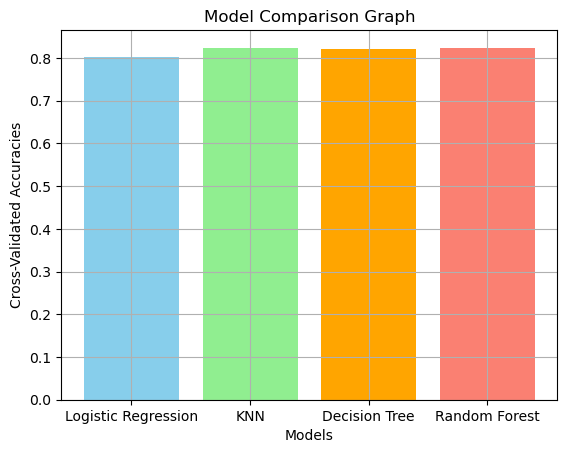

In [175]:
accuracies = []

for name,model in models.items():
    if name in ["Logistic Regression", "KNN"]:
        scores = cross_val_score(model, X_scaled, y, cv=kfold)
    else:
        scores = cross_val_score(model, X, y, cv=kfold)
    accuracies.append(scores.mean())

plt.bar(models.keys(), accuracies, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.title("Model Comparison Graph")
plt.xlabel('Models')
plt.ylabel('Cross-Validated Accuracies')
plt.grid(True)
plt.show()


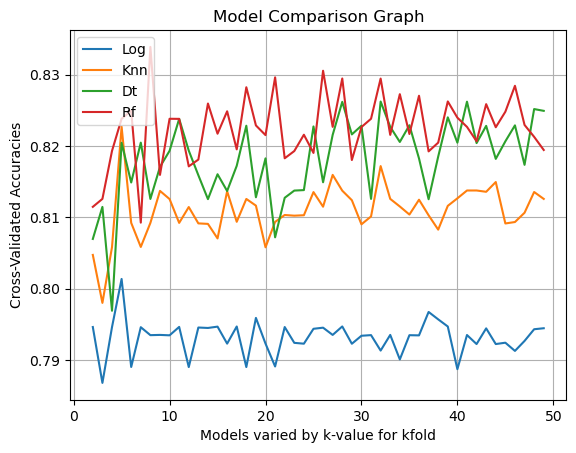

In [176]:
#vary the k values for cross-data validation. 
logs = []
knns = []
dts = []
rfs = []
n=50
ks = list(range(2, n))
 #randomize order by shuffle = True
for K in range(2, n):
    kf = KFold(n_splits=K, shuffle=True, random_state=42) #shuffle to randomize data
    for name,model in models.items():
        if name in ["Logistic Regression", "KNN"]: #only scale Xs for these models bc they rely on distance. 
            scores = cross_val_score(model, X_scaled, y, cv=kf)
            if name == "KNN":
                knns.append(scores.mean())
            else: 
                logs.append(scores.mean())
        else:
            scores = cross_val_score(model, X, y, cv=kf)
            if name == "Random Forest": 
                rfs.append(scores.mean())
            else: 
                 dts.append(scores.mean())
                       
plt.plot(ks, logs, label = "Log")
plt.plot(ks, knns, label = "Knn")
plt.plot(ks, dts, label = "Dt")
plt.plot(ks, rfs, label = "Rf")

plt.title("Model Comparison Graph")
plt.xlabel('Models varied by k-value for kfold')
plt.ylabel('Cross-Validated Accuracies')
plt.grid(True)
plt.legend()
plt.show()

### Conclusion

###### Best Model: 

Random Forest: 82.49%

Based on the models performance the model that works the most efficiently is concluded to be the Random Forest Model. This learning method builds an assembly of many decision trees rather than just having one. The importance of having multiple trees falls under training them differently. This allows for each tree to utilize randomized subsets of training data. By having the element of randomness within the data and the features, this model ensures that individual trees have diversity to them. Although each single tree may be considered a ‘weak’ learner due to its imperfect predictions, the combinations of outputs allow for this model to become very powerful. In comparison to other models such as KNN which is very dependent on the sole choice of ‘K’ and logistical metrics. Where KNN struggles with features that may not be of relevance, random forest is more effective due to its internal ranking of features. Moreover, the fault within decision trees mainly lie within how they overfit badly without pruning. This is not an issue found in Random forest as this model controls overfitting by averaging. Lastly, Logistic regression has limited abilities due to modeling linear relationships and this contrast to random forests due to its ability to work with non-linear patterns. Thus, Random Forest is the strongest model because it not only combines predictions of diverse trees, reduces overfitting, and works well with complex pattern structures. 